In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Balance

## Average

In [27]:
def compute_ud(r, s):
    return 1 + r*s, 1 - s

def average(b0, p, r, s, n):
    return b0 * (p*(1 + r*s) + (1-p)*(1 - s))**n

def std(b0, p, r, s, n):
    avg = average(b0, p, r, s, n)
    avg_of_square = b0**2 * (p*(1 + r*s)**2 + (1-p)*(1 -s)**2)**n
    return np.sqrt(avg_of_square - avg**2) 

def binomial_coefficient(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n-k))

def generate_terms(b0, u, d, p, n):
    terms = []
    terms_p = []
    coefficients = []
    for k in range(n+1):
        coefficient = binomial_coefficient(n, k)
        term = b0 * (u)**(n-k) *  (d)**k
        term_p = (p)**(n-k) *  (1-p)**k
        coefficients = np.append(coefficients, coefficient * term_p)
        terms = np.append(terms, term)
    return coefficients, terms

def max_indices(coefs, first=True):
    position = 0 if first else -1
    max_indices = np.where(coefs == np.max(coefs))[0]
    return max_indices[position]

def modes(b0, p, r, s, n):
    mod1, mod2 = [], []
    for i in range(n):
        coefs, terms = generate_terms(b0, (1 + r*s), (1 - s), p, i)
        idx1 = max_indices(coefs, first=True)
        idx2 = max_indices(coefs, first=False)
        mod1 = np.append(mod1, terms[idx1])
        mod2 = np.append(mod2, terms[idx2])
    return mod1, mod2

def generate_data(coefs, terms):
    return np.repeat(terms, np.round(coefs * len(terms)).astype(int))

def median(b0, p, r, s, n):
    med = []
    for i in range(n):
        coefs, terms = generate_terms(b0, (1 + r*s), (1 - s), p, i)
        data = generate_data(coefs, terms)
        med = np.append(med, np.median(data))
    return med

In [41]:
%%timeit
generate_terms(100,1.1,0.8,0.5,1000)

126 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


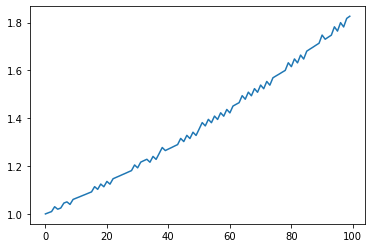

In [28]:
# plt.plot(modes(1, .51, 1, 0.01, 500)[0])
# plt.plot(modes(1, .51, 1, 0.01, 500)[1])
plt.plot(median(1, .54, 2, 0.01, 100))